In [ ]:
!gdown --id 1L..............................

In [3]:
import pandas as pd
df = pd.read_excel('region roles (26.05.22).xlsx')

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import sys

# **1. ИЗУЧЕНИЕ ДАТАСЕТА: ОЦЕНКА ЕГО РАЗМЕРА И НАЛИЧИЯ В НЁМ ПРОПУСКОВ**

In [5]:
# Информация об изначальном датасете: 33 колонки, 69656 строк 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69656 entries, 0 to 69655
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                69656 non-null  int64  
 1   id                        69656 non-null  int64  
 2   premium                   69656 non-null  bool   
 3   name                      69656 non-null  object 
 4   department                5263 non-null   object 
 5   has_test                  69656 non-null  bool   
 6   response_letter_required  69656 non-null  bool   
 7   area                      69656 non-null  object 
 8   salary                    37590 non-null  object 
 9   type                      69656 non-null  object 
 10  address                   40318 non-null  object 
 11  response_url              1 non-null      object 
 12  sort_point_distance       0 non-null      float64
 13  published_at              69656 non-null  object 
 14  create

In [6]:
# Количество пропусков по колонкам
df.isna().sum()

Unnamed: 0                      0
id                              0
premium                         0
name                            0
department                  64393
has_test                        0
response_letter_required        0
area                            0
salary                      32066
type                            0
address                     29338
response_url                69655
sort_point_distance         69656
published_at                    0
created_at                      0
archived                        0
insider_interview           69134
url                             0
alternate_url                   0
relations                       0
employer                        0
snippet                         0
contacts                    34542
schedule                        0
working_days                    0
working_time_intervals          0
working_time_modes              0
accept_temporary                0
description                     0
experience    

In [7]:
# Количество пропусков всего по изначальному датасету: 438439
df.isna().sum().sum()

438439

# **2. ВЫБОР КОЛОНОК ДЛЯ АНАЛИЗА**

Колонки для анализа: 'name', 'area', 'salary', 'experience', 'key_skills', 'specializations'

Тактика анализа:

1. Приведение ЗП к числовому виду;
2. Определение средней ЗП по вакансиям
3. Неграфический и графический анализ заработной платы по вакансиям
4. Анализ распределения вакансий по городам
5. Определение средней заработной платы по городам
6. Выявление наиболее часто встречающихся вакансий по датасету
7. Выявление наиболее необходимых скиллов для самых популярных вакансий в сфере Информационных технологий
8. Определение наиболее востребованных вакансий в сответствии с требуемым опытом работы
9. Определение соответствия размеров оплаты труда и опыта работы

#**3. ПРИВЕДЕНИЕ ЗАРАБОТНОЙ ПЛАТЫ К ЧИСЛОВОМУ ВИДУ**

In [ ]:
df['salary_json'] = df['salary'].fillna('{}').apply(eval)
def get_values(json):
  try:
    return json['from']
  except:
    return None
df['Минимальная зарплата'] = df['salary_json'].apply(get_values)

In [ ]:
df['salary_json'] = df['salary'].fillna('{}').apply(eval)
def get_values(json):
  try:
    return json['to']
  except:
    return None
df['Максимальная зарплата'] = df['salary_json'].apply(get_values)

In [ ]:
df['salary_json'] = df['salary'].fillna('{}').apply(eval)
def get_values(json):
  try:
    return json['currency']
  except:
    return None
df['Валюта'] = df['salary_json'].apply(get_values)

In [ ]:
df['salary_json'] = df['salary'].fillna('{}').apply(eval)
def get_values(json):
  try:
    return json['gross']
  except:
    return None
df['НДФЛ'] = df['salary_json'].apply(get_values)

In [ ]:
df[['Минимальная зарплата', 'Максимальная зарплата']].describe().astype(int)

,Минимальная зарплата,Максимальная зарплата
count,34074,19956
mean,75742,131982
std,66258,183362
min,12,40
25%,36000,50000
50%,57500,87000
75%,100000,150000
max,2000000,10000000


In [ ]:
clear_ndfl = df['НДФЛ'].replace({False: 1, True: 0.87})

In [ ]:
df['Чистый НДФЛ'] = clear_ndfl

In [ ]:
rates = dict(RUR=1, USD=53, EUR=56, KZT=0.12)
df['Минимальная ЗП в рублях'] = df['Валюта'].map(rates)*df['Минимальная зарплата']*df['Чистый НДФЛ']
df['Минимальная ЗП в рублях']

0             NaN
1         21750.0
2             NaN
3         22620.0
4         20000.0
           ...   
69651         NaN
69652    130000.0
69653     50000.0
69654     85000.0
69655         NaN
Name: Минимальная ЗП в рублях, Length: 69656, dtype: float64

In [ ]:
rates = dict(RUR=1, USD=53, EUR=56, KZT=0.12)
df['Максимальная ЗП в рублях'] = df['Валюта'].map(rates)*df['Максимальная зарплата']*df['Чистый НДФЛ']
df['Максимальная ЗП в рублях']

0            NaN
1        43500.0
2            NaN
3            NaN
4        20000.0
          ...   
69651        NaN
69652        NaN
69653        NaN
69654        NaN
69655        NaN
Name: Максимальная ЗП в рублях, Length: 69656, dtype: float64

In [ ]:
df[['Минимальная ЗП в рублях', 'Максимальная ЗП в рублях']].describe().astype(int)

,Минимальная ЗП в рублях,Максимальная ЗП в рублях
count,34059,19946
mean,74959,130997
std,65534,179778
min,10,40
25%,35000,50000
50%,55000,87000
75%,90000,156600
max,2000000,10000000


In [ ]:
df['Средняя ЗП в рублях'] = df[['Минимальная ЗП в рублях', 'Максимальная ЗП в рублях']].mean(axis=1)

In [ ]:
df['Средняя ЗП в рублях']

0             NaN
1         32625.0
2             NaN
3         22620.0
4         20000.0
           ...   
69651         NaN
69652    130000.0
69653     50000.0
69654     85000.0
69655         NaN
Name: Средняя ЗП в рублях, Length: 69656, dtype: float64

#**4. АНАЛИЗ ЧИСЛОВЫХ ДАННЫХ**

#**4.1 Неграфический анализ числовых данных**

In [ ]:
new_df = df[['Максимальная ЗП в рублях','Минимальная ЗП в рублях','Средняя ЗП в рублях']]

In [ ]:
new_df.dropna().describe().astype(int)

,Максимальная ЗП в рублях,Минимальная ЗП в рублях,Средняя ЗП в рублях
count,16430,16430,16430
mean,133557,72400,102979
std,189359,63814,118434
min,40,10,35
25%,50000,35000,43500
50%,87000,52100,70000
75%,160000,88000,129907
max,10000000,2000000,5150000


Максимальная заработная плата среди рассмотренных вакансий составила 20 000 000 руб., а минимальная 10 руб. При этом средняя заработная плата по расчетным данным по всему датасету, составила 102 979 руб.

#**4.2 Графический анализ числовых данных**

(-0.5, 2.5, 0.0, 500000.0)

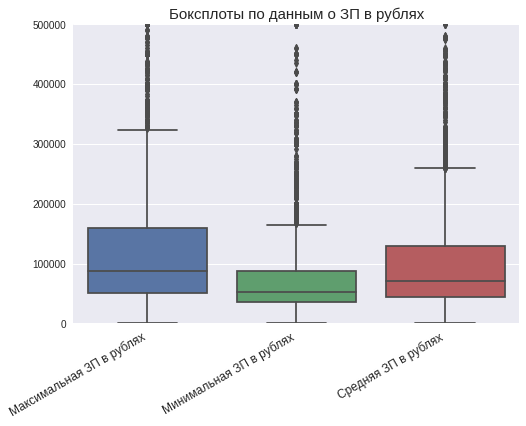

In [ ]:
plt.style.use('seaborn')
params = {
          'axes.titlesize': 15,  
          'xtick.labelsize': 12, 
          'axes.labelsize': 14   
          }
plt.rcParams.update(params)
sns.boxplot(data=new_df.dropna())
plt.title('Боксплоты по данным о ЗП в рублях')
plt.xticks(rotation=30, ha = 'right')
plt.axis(ymin=0, ymax=500000)

#**5. АНАЛИЗ КАТЕГОРИАЛЬНЫХ ДАННЫХ**

In [ ]:
df['area_json'] = df['area'].fillna('{}').apply(eval)
def get_values(json):
  try:
    return json['name']
  except:
    return None
df['Город вакансии'] = df['area_json'].apply(get_values)

In [ ]:
df['Город вакансии'].describe()

count      69656
unique      1032
top       Москва
freq       20066
Name: Город вакансии, dtype: object

In [ ]:
area_count = df['Город вакансии'].value_counts()
area_count[:20]

Москва             20066
Санкт-Петербург     8251
Екатеринбург        2427
Новосибирск         2412
Казань              1927
Краснодар           1707
Нижний Новгород     1645
Ростов-на-Дону      1408
Воронеж             1178
Самара              1141
Красноярск          1032
Уфа                  883
Челябинск            855
Сочи                 817
Пермь                787
Саратов              729
Томск                706
Омск                 700
Тюмень               666
Иркутск              627
Name: Город вакансии, dtype: int64

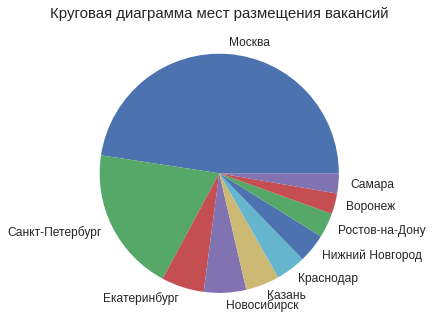

In [ ]:
plt.style.use('seaborn')
params = {
          'axes.titlesize': 15,  
          'xtick.labelsize': 12, 
          'axes.labelsize': 16   
          }
plt.rcParams.update(params)
plt.pie(area_count[:10].values, labels = area_count[:10].index)
plt.title('Круговая диаграмма мест размещения вакансий')
plt.show()

Наибольшее число вакансий по рассмотренному датасету относятся к Москве, Санкт-Петербургу, Екатеринбургу, Новосибирску и Казани.

#**6. АНАЛИЗ КАТЕГОРИАЛЬНЫХ И ЧИСЛОВЫХ ДАННЫХ**

#**6.1 Анализ средней ЗП по городам**

In [ ]:
df.groupby('Город вакансии')["Средняя ЗП в рублях"].median()

Город вакансии
Абакан                                        42162.5
Абан                                          67515.0
Абинск                                        87000.0
Агрыз                                         34000.0
Адлер                                        220000.0
                                               ...   
Ярцево                                        34800.0
Ясногорск                                     39467.5
Яхрома                                       140000.0
Яя                                            45000.0
посёлок Володарского (Московская область)    120000.0
Name: Средняя ЗП в рублях, Length: 1032, dtype: float64

In [ ]:
grouped_area_salary = df.groupby('Город вакансии')["Средняя ЗП в рублях"]

In [ ]:
grouped_area_salary.describe().sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Город вакансии,,,,,,,,
Москва,7793.0,125896.048652,106293.915000,20.00,67425.0,100000.0,156600.0,5150000.0
Санкт-Петербург,3625.0,107328.684873,79378.983597,20.00,52200.0,80000.0,145000.0,870000.0
Екатеринбург,1308.0,88215.012351,65469.782962,5000.00,45000.0,65000.0,115000.0,501000.0
Новосибирск,1193.0,99725.282896,78128.789083,11310.00,45000.0,70000.0,130000.0,600000.0
Краснодар,1117.0,90521.810654,74355.587135,39.15,40020.0,65000.0,120000.0,825000.0
...,...,...,...,...,...,...,...,...
Обливская,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Нягань,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Вольгинский,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_city = df[['Город вакансии','Средняя ЗП в рублях']]

In [ ]:
city = ['Москва', 'Санкт-Петербург', 'Казань', 'Екатеринбург', 'Новосибирск', 'Краснодар']

In [ ]:
filter = df_city['Город вакансии'].isin(city)
filtered_dataset = df_city[filter]
filtered_dataset.dropna()

,Город вакансии,Средняя ЗП в рублях
10149,Москва,159000.0
10153,Москва,250000.0
10155,Москва,50000.0
10157,Москва,127200.0
10162,Москва,139200.0
...,...,...
66521,Новосибирск,250000.0
66522,Новосибирск,207495.0
66525,Новосибирск,80000.0
66528,Новосибирск,140000.0


In [ ]:
filtered_dataset.groupby('Город вакансии')['Средняя ЗП в рублях'].describe()

,count,mean,std,min,25%,50%,75%,max
Город вакансии,,,,,,,,
Екатеринбург,1308.0,88215.012351,65469.782962,5000.00,45000.0,65000.0,115000.0,501000.0
Казань,965.0,91989.860233,84267.702709,8700.00,37500.0,60000.0,117450.0,875000.0
Краснодар,1117.0,90521.810654,74355.587135,39.15,40020.0,65000.0,120000.0,825000.0
Москва,7793.0,125896.048652,106293.915000,20.00,67425.0,100000.0,156600.0,5150000.0
Новосибирск,1193.0,99725.282896,78128.789083,11310.00,45000.0,70000.0,130000.0,600000.0
Санкт-Петербург,3625.0,107328.684873,79378.983597,20.00,52200.0,80000.0,145000.0,870000.0


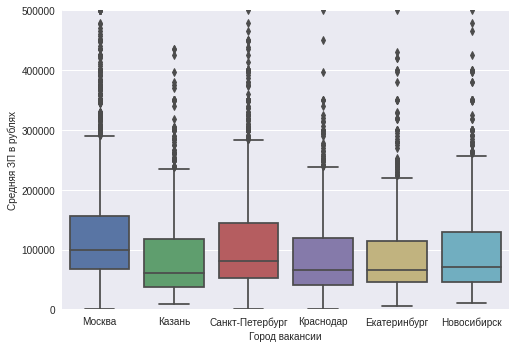

In [ ]:
sns.boxplot(x='Город вакансии', y='Средняя ЗП в рублях', data=filtered_dataset)
params = {
          'axes.titlesize': 10,  
          'xtick.labelsize': 10, 
          'axes.labelsize': 10   
          }
plt.rcParams.update(params)
plt.axis(ymin=0, ymax=500000)
plt.show()

Оценивая предлагаемую заработную плату по городам с наибольшим количеством вакансий можно отметить, что средняя заработная плата по представленным выше городам находится в пределах от 88,2 тыс. руб. до 125,87 тыс. руб.(Екатеринбург и Москва, соответственно).

In [ ]:
vacancy_count = df['name'].value_counts()
vacancy_count[:20]

Системный администратор             1659
Программист 1С                      1123
Менеджер по персоналу                680
Менеджер по подбору персонала        571
Специалист технической поддержки     483
Специалист по кадрам                 469
Системный аналитик                   466
Агент по недвижимости                374
Аналитик                             346
SMM-менеджер                         342
Инженер-программист                  330
Программист 1C                       325
Графический дизайнер                 316
Специалист отдела кадров             284
Бизнес-аналитик                      273
Инженер технической поддержки        273
Дизайнер                             259
Специалист по подбору персонала      257
Менеджер по продаже недвижимости     244
HR менеджер                          238
Name: name, dtype: int64

По представленному датасету среди всех вакансий, безотносительно сферы деятельности, больше всего представлено по следующим позициям:

системный администратор;
программист 1С;
менеджер по персоналу;
менеджер по подбору персонала;
специалист технической поддержки.

In [ ]:
vacancy_types = vacancy_count[vacancy_count>470]

In [ ]:
vacancy_types

Системный администратор             1659
Программист 1С                      1123
Менеджер по персоналу                680
Менеджер по подбору персонала        571
Специалист технической поддержки     483
Name: name, dtype: int64

In [ ]:
vacancy_count

Системный администратор                                                   1659
Программист 1С                                                            1123
Менеджер по персоналу                                                      680
Менеджер по подбору персонала                                              571
Специалист технической поддержки                                           483
                                                                          ... 
Руководитель проекта (Открытие баров)                                        1
Старший менеджер проектного офиса трансформации операционного блока          1
Product Lead Manager / Product owner / Product manager mobile-проектов       1
Руководитель проектов (терминал лазерной связи)                              1
Начальник отдела по защите информации и информационной безопасности          1
Name: name, Length: 31756, dtype: int64

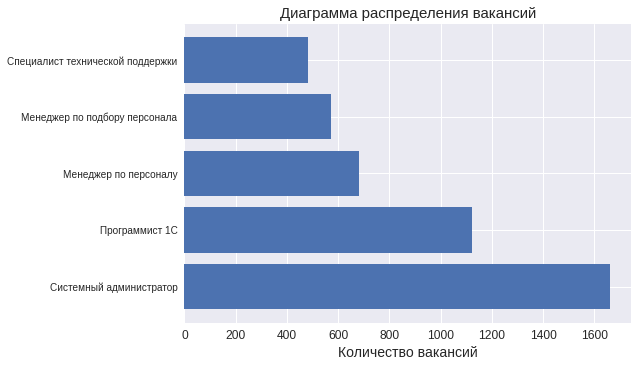

In [ ]:
plt.title('Диаграмма распределения вакансий')
plt.xlabel('Количество вакансий')
plt.barh(vacancy_types.index, vacancy_types.values)
plt.show()

#**6.2 Анализ наиболее востребованных скиллов по всему датасету**

In [ ]:
import json
def text_to_json(text):
  try:
    return json.loads(text.replace('"', '').replace("'", '"'))
  except:
    return []
df['key_skills_json'] = df['key_skills'].apply(text_to_json)

In [ ]:
def get_values(json):
  try:
    out = []
    if len(json)>0:
      for i in json:
        out.append(i['name'])
    return out
  except:
    return []
df['key_skills_list'] = df['key_skills_json'].apply(get_values)

In [ ]:
df['key_skills_list']

0                                                       []
1                        [Git, SQL, Тестирование, C#, API]
2        [SQL, Linux, Информационная безопасность, Рабо...
3        [Пользователь ПК, Работа в команде, 1С: Предпр...
4        [MS Dos, Диагностика ПК, Компьютер, Работа в у...
                               ...                        
69651                                                   []
69652    [1С: Управление Торговлей, 1С: Предприятие 8, ...
69653    [Организаторские навыки, Работа в команде, Упр...
69654                                                   []
69655    [Информационная безопасность, Аудит безопаснос...
Name: key_skills_list, Length: 69656, dtype: object

In [ ]:
new_df_skills = df.explode('key_skills_list')

In [ ]:
top_skills = new_df_skills['key_skills_list'].value_counts()

In [ ]:
top_skills[:30]

Работа в команде                       8057
Грамотная речь                         6734
SQL                                    6393
Linux                                  4943
Git                                    4587
Английский язык                        4454
Подбор персонала                       4326
Ведение переговоров                    4111
Управление проектами                   3697
Python                                 3249
Деловое общение                        3235
Пользователь ПК                        3218
Обучение и развитие                    3206
Активные продажи                       3052
Телефонные переговоры                  2818
JavaScript                             2774
Организаторские навыки                 2621
1С программирование                    2598
PostgreSQL                             2565
Adobe Photoshop                        2403
Деловая коммуникация                   2325
Java                                   2315
1С: Предприятие 8               

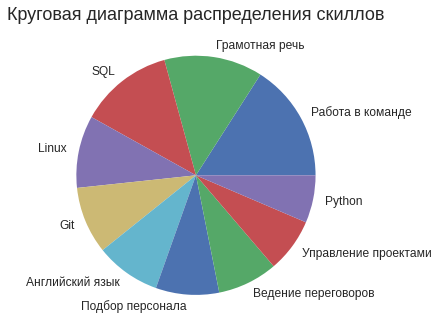

In [ ]:
params = {
          'axes.titlesize': 18,   # Размер шрифта главной подписи
          'xtick.labelsize': 12,  # Размер шрифта подписей тикетов оси X
          'axes.labelsize': 14    # Размер шрифта подписей осей
          }
plt.rcParams.update(params)
plt.title('Круговая диаграмма распределения скиллов')
plt.pie(top_skills[:10].values, labels = top_skills[:10].index)
plt.show()

Наиболее необходимыми скилами, внезависмости от группировки, по всеу датасету, являются представленные выше в диаграмме. Так наиболее ценными скилами для работодателей, которые они хотят видеть у соискателей являются:

работа в команде;
грамотная речь;
SQL;
Linux;
GIT.

#**6.3 Анализ специализаций по датасету**

In [ ]:
import json
def text_to_json(text):
  try:
    return json.loads(text.replace('"', '').replace("'", '"'))
  except:
    return []
df['specializations_json'] = df['specializations'].apply(text_to_json)

In [ ]:
def get_values(json):
  try:
    out = []
    if len(json)>0:
      for i in json:
        out.append(i['name'])
    return out
  except:
    return []
df['specializations_list'] = df['specializations_json'].apply(get_values)

In [ ]:
new_df_specs = df.explode('specializations_list')

In [ ]:
new_df_specs

,Unnamed: 0,id,premium,name,department,has_test,response_letter_required,area,salary,type,...,Чистый НДФЛ,Минимальная ЗП в рублях,Максимальная ЗП в рублях,Средняя ЗП в рублях,area_json,Город вакансии,key_skills_json,key_skills_list,specializations_json,specializations_list
0,0,49059633,False,Младший специалист ручного тестирования,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,NaN,NaN,NaN,NaN,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",Астрахань,[],[],"[{'id': '1.172', 'name': 'Начальный уровень, М...","Начальный уровень, Мало опыта"
0,0,49059633,False,Младший специалист ручного тестирования,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,NaN,NaN,NaN,NaN,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",Астрахань,[],[],"[{'id': '1.172', 'name': 'Начальный уровень, М...",Тестирование
0,0,49059633,False,Младший специалист ручного тестирования,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,NaN,NaN,NaN,NaN,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",Астрахань,[],[],"[{'id': '1.172', 'name': 'Начальный уровень, М...","Информационные технологии, Интернет, Мультимедиа"
1,1,54653519,False,Тестировщик.Net,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 25000, 'to': 50000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,0.87,21750.0,43500.0,32625.0,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",Астрахань,"[{'name': 'Git'}, {'name': 'SQL'}, {'name': 'Т...","[Git, SQL, Тестирование, C#, API]","[{'id': '1.221', 'name': 'Программирование, Ра...","Программирование, Разработка"
1,1,54653519,False,Тестировщик.Net,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 25000, 'to': 50000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,0.87,21750.0,43500.0,32625.0,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",Астрахань,"[{'name': 'Git'}, {'name': 'SQL'}, {'name': 'Т...","[Git, SQL, Тестирование, C#, API]","[{'id': '1.221', 'name': 'Программирование, Ра...",Инженер
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69653,465,54749225,False,Начальник отдела информационных технологий,NaN,False,False,"{'id': '92', 'name': 'Тула', 'url': 'https://a...","{'from': 50000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",...,1.00,50000.0,NaN,50000.0,"{'id': '92', 'name': 'Тула', 'url': 'https://a...",Тула,"[{'name': 'Организаторские навыки'}, {'name': ...","[Организаторские навыки, Работа в команде, Упр...","[{'id': '9.94', 'name': 'Информационные технол...","CTO, CIO, Директор по IT"
69654,466,55498724,False,"Технический директор (DevOps, технолог)",NaN,False,False,"{'id': '92', 'name': 'Тула', 'url': 'https://a...","{'from': 85000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",...,1.00,85000.0,NaN,85000.0,"{'id': '92', 'name': 'Тула', 'url': 'https://a...",Тула,[],[],"[{'id': '9.94', 'name': 'Информационные технол...","Информационные технологии, Интернет, Мультимедиа"
69654,466,55498724,False,"Технический директор (DevOps, технолог)",NaN,False,False,"{'id': '92', 'name': 'Тула', 'url': 'https://a...","{'from': 85000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",...,1.00,85000.0,NaN,85000.0,"{'id': '92', 'name': 'Тула', 'url': 'https://a...",Тула,[],[],"[{'id': '9.94', 'name': 'Информационные технол...","CTO, CIO, Директор по IT"
69655,467,55544352,False,Начальник отдела по защите информации и информ...,NaN,False,False,"{'id': '92', 'name': 'Тула', 'url': 'https://a...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,NaN,NaN,NaN,NaN,"{'id': '92', 'name': 'Тула', 'url': 'https://a...",Тула,"[{'name': 'Информационная безопасность'}, {'na...","[Информационная безопасность, Аудит безопаснос...","[{'id': '9.94', 'name': 'Информационные технол...",

In [ ]:
top_specs = new_df_specs['specializations_list'].value_counts()

In [ ]:
top_specs[:50]

Инженер                                             32381
Программирование, Разработка                        24349
Системы управления предприятием (ERP)               18222
Поддержка, Helpdesk                                 15282
Системный администратор                             15207
Начальный уровень, Мало опыта                       14883
Web инженер                                         14408
Web мастер                                          14378
Аналитик                                            13223
Интернет                                            12354
Другое                                              12116
Сетевые технологии                                   9787
Управление персоналом                                8414
Рекрутмент                                           8399
Управление проектами                                 7260
Агент                                                6176
Прямые продажи                                       6127
Менеджер по ра

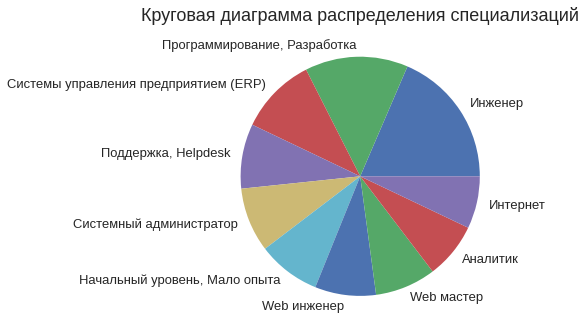

In [ ]:
plt.title('Круговая диаграмма распределения специализаций')
params = {
          'axes.titlesize': 18,  
          'xtick.labelsize': 13, 
          'axes.labelsize': 10   
          }
plt.rcParams.update(params)
plt.pie(top_specs[:10].values, labels = top_specs[:10].index)
plt.show()

Наиболее востребованными специализациями по рассматриваемому датасету стали:
- инженер;
- программирование и разработка;
- системы управления предприятием;
- поддержка;
- системный администратор.

#**6.4 Анализ соотношения вакансий и опыта работы**

In [ ]:
df['experience_json'] = df['experience'].fillna('{}').apply(eval)
def get_values(json):
  try:
    return json['name']
  except:
    return None
df['Опыт работы'] = df['experience_json'].apply(get_values)

In [ ]:
df['name'].unique()

array(['Младший специалист ручного тестирования', 'Тестировщик.Net',
       'Пентестер', ..., 'Ведущий Web-разработчик/Team Lead',
       'Технический директор (DevOps, технолог)',
       'Начальник отдела по защите информации и информационной безопасности'],
      dtype=object)

In [ ]:
df['Опыт работы'].unique()

array(['Нет опыта', 'От 1 года до 3 лет', 'От 3 до 6 лет', 'Более 6 лет'],
      dtype=object)

In [ ]:
df['Опыт работы'].value_counts()

От 1 года до 3 лет    34989
От 3 до 6 лет         19823
Нет опыта             12646
Более 6 лет            2198
Name: Опыт работы, dtype: int64

In [ ]:
exp_count = df['Опыт работы'].value_counts()

In [ ]:
labels = df['Опыт работы'].unique()
colors = dict(zip(labels, plt.cm.tab20.colors[:len(labels)]))
colors

{'Нет опыта': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 'От 1 года до 3 лет': (0.6823529411764706,
  0.7803921568627451,
  0.9098039215686274),
 'От 3 до 6 лет': (1.0, 0.4980392156862745, 0.054901960784313725),
 'Более 6 лет': (1.0, 0.7333333333333333, 0.47058823529411764)}

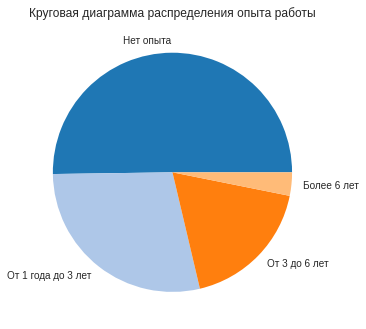

In [ ]:
plt.title('Круговая диаграмма распределения опыта работы')
plt.pie(exp_count.values, labels = labels, colors = [colors[key] for key in labels])
plt.show()

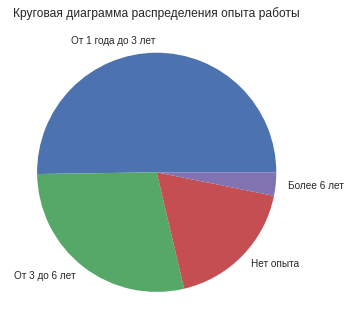

In [ ]:
plt.title('Круговая диаграмма распределения опыта работы')
plt.pie(exp_count.values, labels = exp_count.index)
plt.legend(patches, labels, title="Типы здания", loc="upper center", bbox_to_anchor=(1, 0, 0.5, 1)) 
plt.show()

In [ ]:
exp_times = df['Опыт работы'].unique()
exp_times

array(['Нет опыта', 'От 1 года до 3 лет', 'От 3 до 6 лет', 'Более 6 лет'],
      dtype=object)

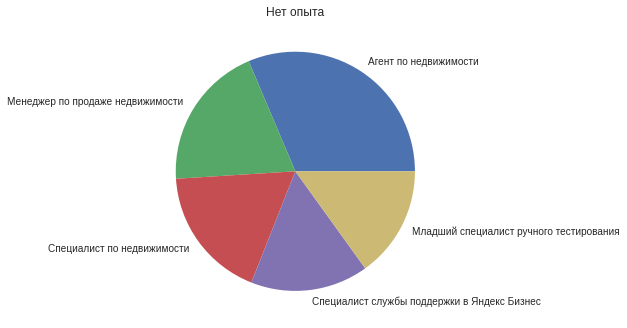

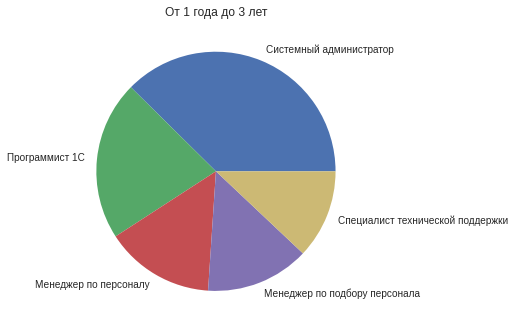

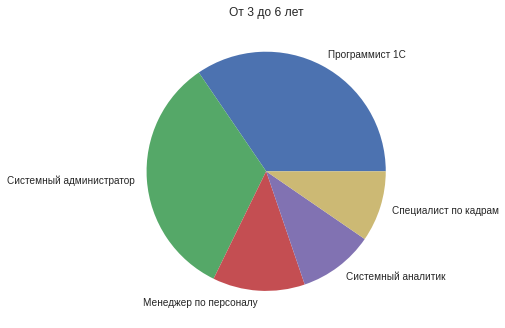

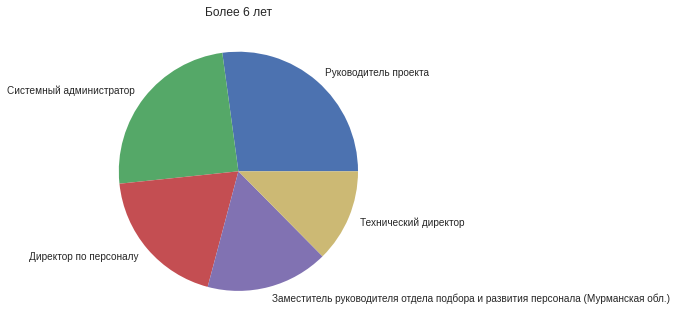

In [ ]:
import matplotlib.pyplot as plt

for exp_time in exp_times:
  dataset = df[df['Опыт работы']==exp_time] 
  vacancy_counts = dataset['name'].value_counts()

  plt.title(exp_time)
  plt.pie(vacancy_counts[:5].values, labels=vacancy_counts[:5].index)
  plt.show()

In [ ]:
filter_dataset = df[df['specializations'].str.contains("Информационные технологии", na=False)]

In [ ]:
exp_count_2 = filter_dataset['Опыт работы'].value_counts()

In [ ]:
exp_times_2 = df['Опыт работы'].unique()
exp_times_2

array(['Нет опыта', 'От 1 года до 3 лет', 'От 3 до 6 лет', 'Более 6 лет'],
      dtype=object)

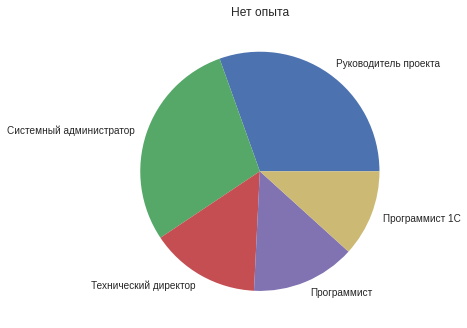

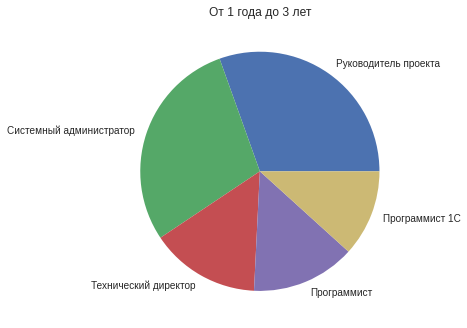

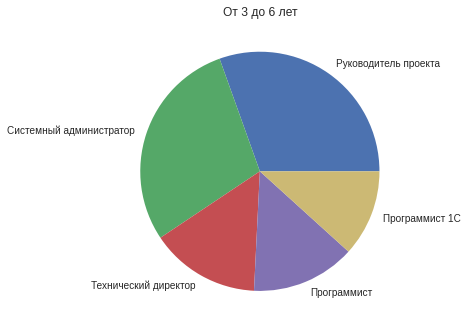

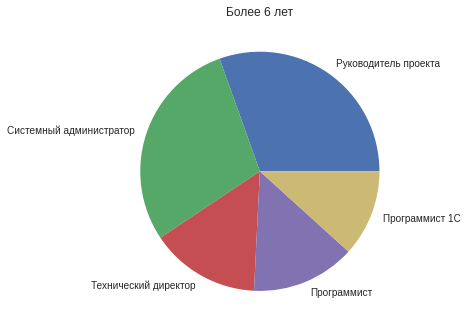

In [ ]:
import matplotlib.pyplot as plt

for exp_time_2 in exp_times_2:
  dataset = filter_dataset[filter_dataset['Опыт работы']==exp_time] 
  vacancy_counts = dataset['name'].value_counts()

  plt.title(exp_time_2)
  plt.pie(vacancy_counts[:5].values, labels=vacancy_counts[:5].index)
  plt.show()

In [ ]:
df.groupby('name')["Опыт работы"]

In [ ]:
df.groupby('Опыт работы')['name'].describe()

,count,unique,top,freq
Опыт работы,,,,
Более 6 лет,2198,1524,Руководитель проекта,41
Нет опыта,12646,5594,Агент по недвижимости,331
От 1 года до 3 лет,34989,16786,Системный администратор,1065
От 3 до 6 лет,19823,10613,Программист 1С,454


In [ ]:
df.groupby('Опыт работы')["Средняя ЗП в рублях"]

In [ ]:
df.groupby('Опыт работы')["Средняя ЗП в рублях"].describe().sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Опыт работы,,,,,,,,
От 1 года до 3 лет,18364.0,78960.824047,80036.952712,30.0,40000.0,60000.0,95000.0,5150000.0
Нет опыта,10457.0,83947.939063,118544.489681,20.0,30000.0,50000.0,100000.0,2575000.0
От 3 до 6 лет,7933.0,127928.520069,101164.885549,70.0,65000.0,100050.0,170000.0,2750000.0
Более 6 лет,821.0,159852.658496,106471.929262,800.0,85000.0,136155.0,200000.0,870000.0


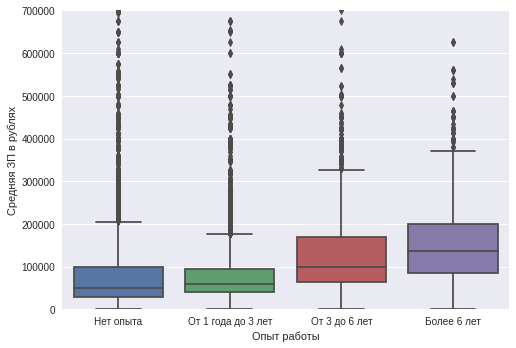

In [ ]:
sns.boxplot(x='Опыт работы', y='Средняя ЗП в рублях', data=df)
plt.axis(ymin=0, ymax=700000)
plt.show()

In [ ]:
filter_dataset.groupby('name')["Опыт работы"]

In [ ]:
filter_dataset.groupby('Опыт работы')['name'].describe()

,count,unique,top,freq
Опыт работы,,,,
Более 6 лет,1675,1213,Руководитель проекта,39
Нет опыта,6011,2685,Специалист службы поддержки в Яндекс Бизнес,168
От 1 года до 3 лет,26163,12959,Системный администратор,1064
От 3 до 6 лет,16548,9122,Программист 1С,454


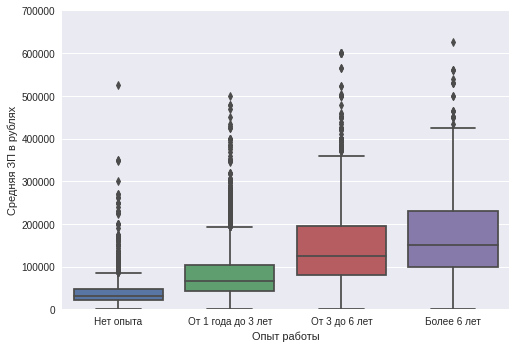

In [ ]:
sns.boxplot(x='Опыт работы', y='Средняя ЗП в рублях', data=filter_dataset)
plt.axis(ymin=0, ymax=700000)
plt.show()

Выше было представлено соотношение соответсвия наиболее предлагаемых вакансий в соотвествии с опытом работы по всему датасету, а также в сфере информационных технологий.

#**6.5 Анализ соответстия скиллов по наиболее востребованным вакансиям в сфере информационных технологий**

In [ ]:
top_names = filter_dataset['name'].value_counts()

In [ ]:
top_names [:20]

Системный администратор                        1657
Программист 1С                                 1122
Специалист технической поддержки                480
Системный аналитик                              466
Аналитик                                        343
Инженер-программист                             328
Программист 1C                                  325
Графический дизайнер                            314
Инженер технической поддержки                   273
Бизнес-аналитик                                 268
Дизайнер                                        252
Технический писатель                            214
Руководитель проекта                            212
Специалист по информационной безопасности       185
Frontend-разработчик                            184
DevOps инженер                                  181
Программист                                     181
Специалист службы поддержки в Яндекс Бизнес     168
Менеджер проектов                               163
Руководитель

In [ ]:
df_skvac = filter_dataset[['name', 'key_skills_list']]

In [ ]:
name_skills = df_skvac.explode('key_skills_list')

In [ ]:
name_skills

,name,key_skills_list
0,Младший специалист ручного тестирования,NaN
1,Тестировщик.Net,Git
1,Тестировщик.Net,SQL
1,Тестировщик.Net,Тестирование
1,Тестировщик.Net,C#
...,...,...
69655,Начальник отдела по защите информации и информ...,Информационная безопасность
69655,Начальник отдела по защите информации и информ...,Аудит безопасности
69655,Начальник отдела по защите информации и информ...,Средства криптографической защиты информации
69655,Начальник отдела по защите информации и информ...,Английский язык


In [ ]:
name_skills['name'].value_counts()

Системный администратор                                                  9398
Программист 1С                                                           4698
Системный аналитик                                                       2833
Специалист технической поддержки                                         2519
Аналитик                                                                 1961
                                                                         ... 
Инженер / Ведущий инженер по информационной безопасности                    1
Менеджер по регионам РФ                                                     1
Архитектор сетей ЛВС (главный специалист по телекоммутационным сетям)       1
Администратор строительных проектов                                         1
Руководитель группы технических писателей                                   1
Name: name, Length: 24009, dtype: int64

In [ ]:
top_names = name_skills['name'].value_counts()

In [ ]:
name_filters = top_names[:5].index
name_filters

Index(['Системный администратор', 'Программист 1С', 'Системный аналитик',
       'Специалист технической поддержки', 'Аналитик'],
      dtype='object')

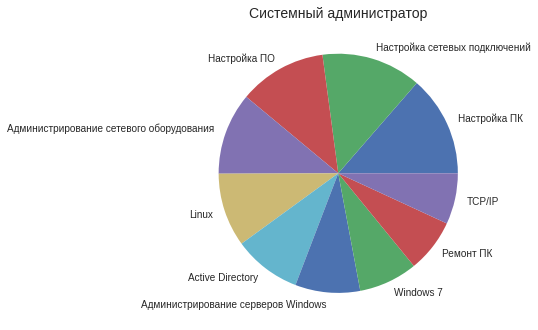

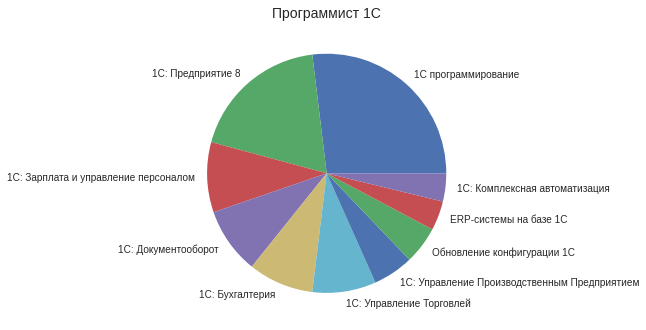

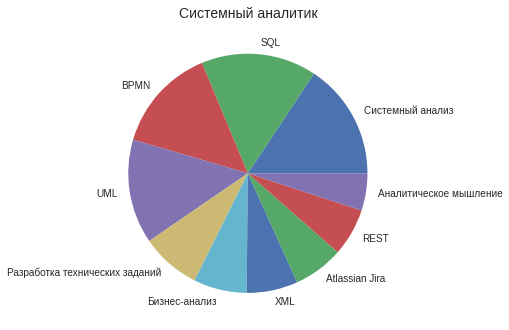

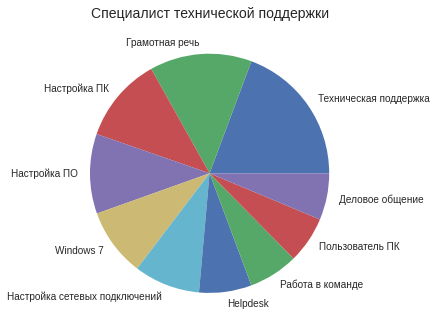

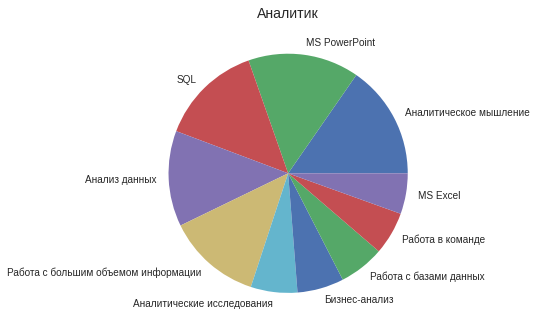

In [ ]:
params = {
          'axes.titlesize': 14,  
          'xtick.labelsize': 10, 
          'axes.labelsize': 10   
          }
plt.rcParams.update(params)
for name_filter in name_filters:
  dataset = name_skills[name_skills['name']==name_filter] 
  skills_counts = dataset['key_skills_list'].value_counts()

  plt.title(name_filter)
  plt.pie(skills_counts[:10].values, labels=skills_counts[:10].index)
  plt.show()

In [ ]:
labels = skills_counts[:5].index
colors = dict(zip(labels, plt.cm.tab20.colors[:len(labels)]))
colors

{'Аналитическое мышление': (0.12156862745098039,
  0.4666666666666667,
  0.7058823529411765),
 'MS PowerPoint': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 'SQL': (1.0, 0.4980392156862745, 0.054901960784313725),
 'Анализ данных': (1.0, 0.7333333333333333, 0.47058823529411764),
 'Работа с большим объемом информации': (0.17254901960784313,
  0.6274509803921569,
  0.17254901960784313)}

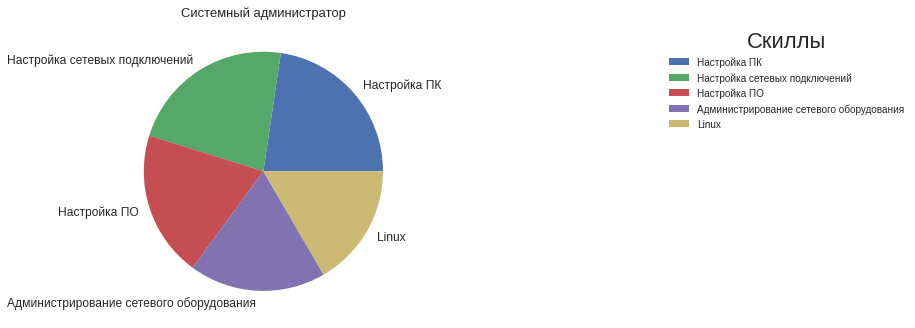

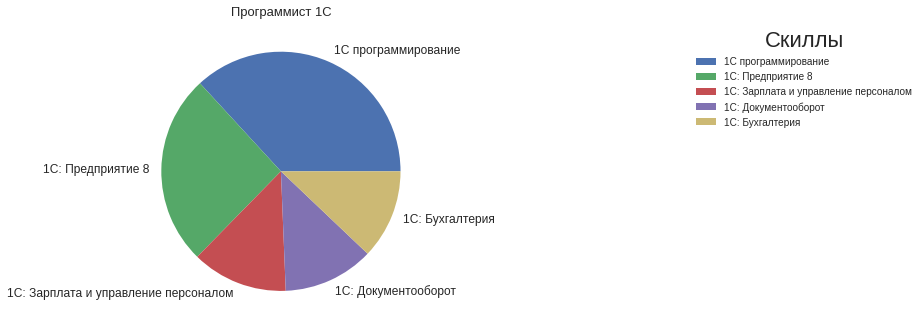

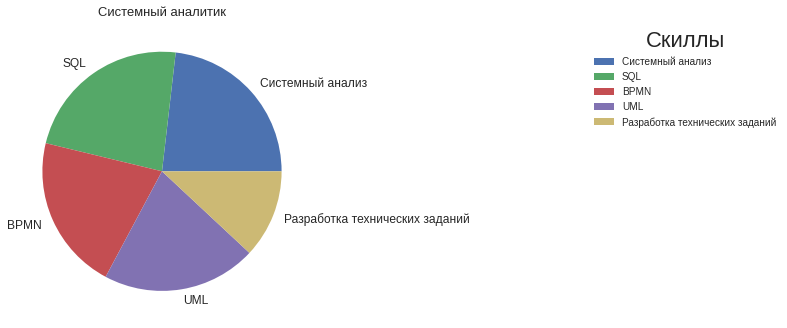

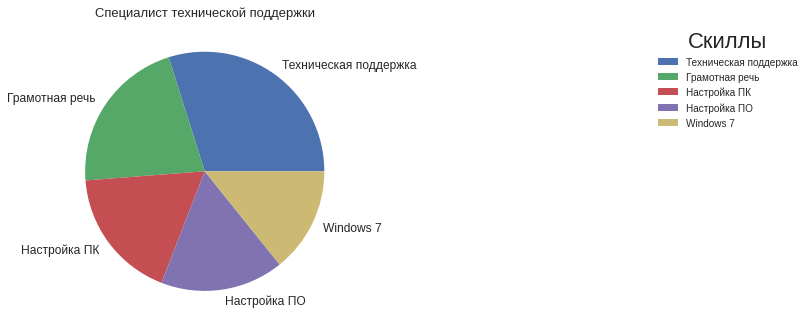

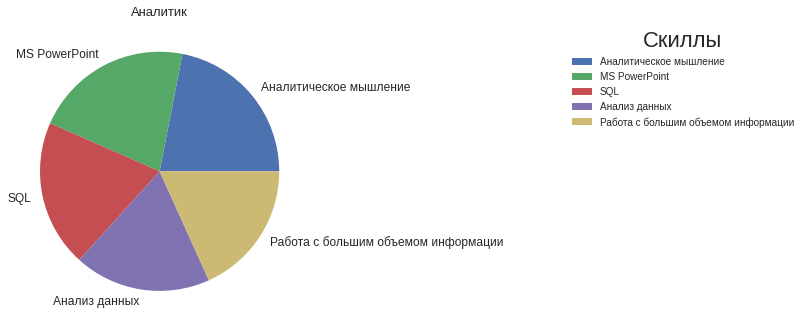

In [ ]:
params = {
          'axes.titlesize': 13,  
          'xtick.labelsize': 12, 
          'axes.labelsize': 9   
          }
plt.rcParams.update(params)

for name_filter in name_filters:
  dataset = name_skills[name_skills['name']==name_filter] 
  skills_counts = dataset['key_skills_list'].value_counts()
  labels = skills_counts[:5].index

  plt.title(name_filter)
  patches, texts = plt.pie(
      skills_counts[:5].values, 
      labels=labels,
      )
  plt.legend(patches, labels, title="Скиллы", loc="upper center", bbox_to_anchor=(2, 0, 0.5, 1)) 
  plt.show()

Таким образом, в заключение изучения датасета был представлен анализ соответствия наиболее востребованных вакансий в сфере информационных технологий и скиллов, которые наиболее востребованы со стороны работодателей.
Так для системного администратора работодатели требуют наличия таких скиллов, как:
- настройка сетевых подключений;
- настройка ПК;
- TCP/IP;
- ремонт ПК;
- Windows 7;
- Администрование серверов Windows;
- Active Directory;
- Linux;
- Администрование сетевого оборудования;
- настройка ПО.

На базе представленного выше алгоритма анализа компания заказчик может выбирать наиболее востребованные вакансии, а также соотвествующие им скиллы, по которым сможет разработать наиболее востребованные курсы.
